In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("sales_data_sample.csv",sep=",", encoding='Latin-1')

In [3]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [5]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [6]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [7]:
df.drop(['CUSTOMERNAME','PHONE','ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE','POSTALCODE','TERRITORY','CONTACTFIRSTNAME', 
         'CONTACTLASTNAME','ORDERNUMBER', 'STATUS' ], axis=1, inplace = True)

In [8]:
df.isnull().sum()

QUANTITYORDERED    0
PRICEEACH          0
ORDERLINENUMBER    0
SALES              0
ORDERDATE          0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
PRODUCTCODE        0
COUNTRY            0
DEALSIZE           0
dtype: int64

In [9]:
df.dtypes

QUANTITYORDERED      int64
PRICEEACH          float64
ORDERLINENUMBER      int64
SALES              float64
ORDERDATE           object
QTR_ID               int64
MONTH_ID             int64
YEAR_ID              int64
PRODUCTLINE         object
MSRP                 int64
PRODUCTCODE         object
COUNTRY             object
DEALSIZE            object
dtype: object

In [10]:
df['COUNTRY'].unique()

array(['USA', 'France', 'Norway', 'Australia', 'Finland', 'Austria', 'UK',
       'Spain', 'Sweden', 'Singapore', 'Canada', 'Japan', 'Italy',
       'Denmark', 'Belgium', 'Philippines', 'Germany', 'Switzerland',
       'Ireland'], dtype=object)

In [11]:
df['PRODUCTLINE'].unique()

array(['Motorcycles', 'Classic Cars', 'Trucks and Buses', 'Vintage Cars',
       'Planes', 'Ships', 'Trains'], dtype=object)

In [12]:
df['DEALSIZE'].unique()

array(['Small', 'Medium', 'Large'], dtype=object)

In [13]:
productline = pd.get_dummies(df['PRODUCTLINE'], drop_first = True) 
dealsize = pd.get_dummies(df['DEALSIZE'], drop_first = True)

In [14]:
df = pd.concat([df,productline,dealsize], axis = 1)

In [15]:
df.drop(['COUNTRY','PRODUCTLINE','DEALSIZE','ORDERDATE'],axis=1, inplace=True)

In [16]:
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Medium,Small
0,30,95.70,2,2871.00,1,2,2003,95,S10_1678,1,0,0,0,0,0,0,1
1,34,81.35,5,2765.90,2,5,2003,95,S10_1678,1,0,0,0,0,0,0,1
2,41,94.74,2,3884.34,3,7,2003,95,S10_1678,1,0,0,0,0,0,1,0
3,45,83.26,6,3746.70,3,8,2003,95,S10_1678,1,0,0,0,0,0,1,0
4,49,100.00,14,5205.27,4,10,2003,95,S10_1678,1,0,0,0,0,0,1,0


In [17]:
df['PRODUCTCODE'].unique()

array(['S10_1678', 'S10_1949', 'S10_2016', 'S10_4698', 'S10_4757',
       'S10_4962', 'S12_1099', 'S12_1108', 'S12_1666', 'S12_2823',
       'S12_3148', 'S12_3380', 'S12_3891', 'S12_3990', 'S12_4473',
       'S12_4675', 'S18_1097', 'S18_1129', 'S18_1342', 'S18_1367',
       'S18_1589', 'S18_1662', 'S18_1749', 'S18_1889', 'S18_1984',
       'S18_2238', 'S18_2248', 'S18_2319', 'S18_2325', 'S18_2432',
       'S18_2581', 'S18_2625', 'S18_2795', 'S18_2870', 'S18_2949',
       'S18_2957', 'S18_3029', 'S18_3136', 'S18_3140', 'S18_3232',
       'S18_3259', 'S18_3278', 'S18_3320', 'S18_3482', 'S18_3685',
       'S18_3782', 'S18_3856', 'S18_4027', 'S18_4409', 'S18_4522',
       'S18_4600', 'S18_4668', 'S18_4721', 'S18_4933', 'S24_1046',
       'S24_1444', 'S24_1578', 'S24_1628', 'S24_1785', 'S24_1937',
       'S24_2000', 'S24_2011', 'S24_2022', 'S24_2300', 'S24_2360',
       'S24_2766', 'S24_2840', 'S24_2841', 'S24_2887', 'S24_2972',
       'S24_3151', 'S24_3191', 'S24_3371', 'S24_3420', 'S24_34

In [18]:
df['PRODUCTCODE'] = pd.Categorical(df['PRODUCTCODE']).codes

In [19]:
df['PRODUCTCODE'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108], dtype=int8)

In [20]:
from sklearn.cluster import KMeans

In [21]:
distortions = [] 
X = df.values
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_) 

In [22]:
sn.set_style("whitegrid")

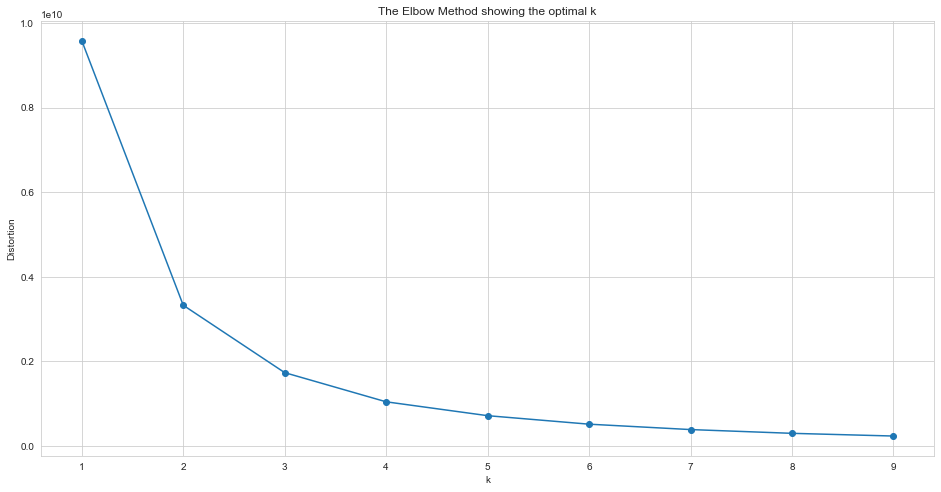

In [23]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'o-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [24]:
kmeans = KMeans(n_clusters=3)

In [25]:
y_kmeans = kmeans.fit_predict(X)

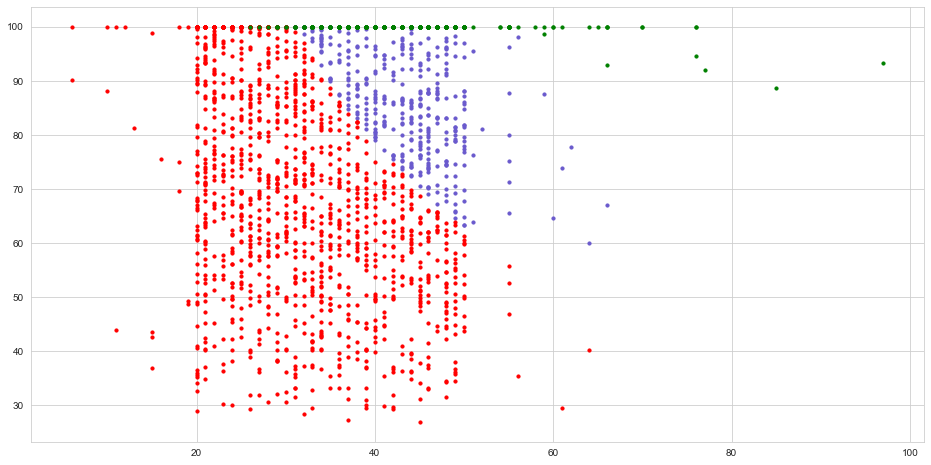

In [26]:
plt.figure(figsize=(16,8))
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=10, c='slateblue', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=10, c='red', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=10, c='green', label ='Cluster 3')

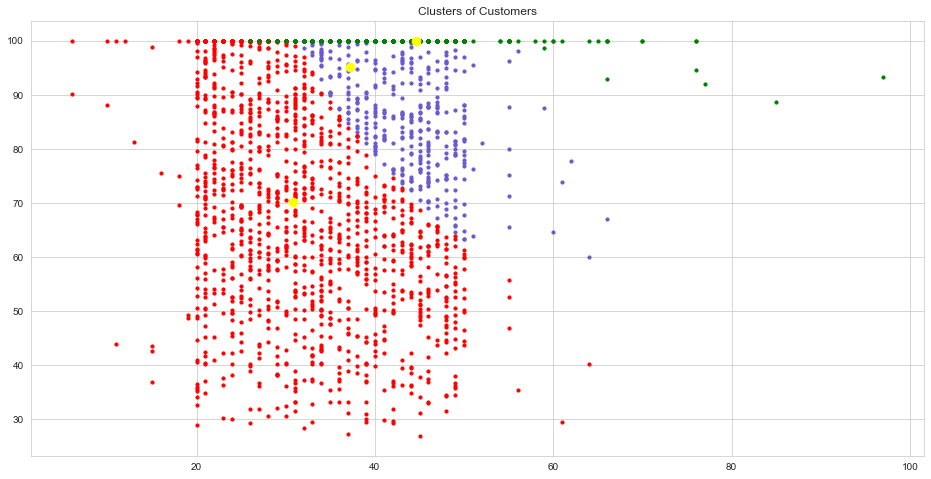

In [27]:
plt.figure(figsize=(16,8))
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=10, c='slateblue', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=10, c='red', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=10, c='green', label ='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=75, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.show()